<a href="https://colab.research.google.com/github/WillianCella/ModelosDeAprendizadoSupervisionado2/blob/main/Trabalho_2_%E2%80%93_Modelos_de_Aprendizado_Supervisionado_RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [67]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [68]:
path = "/content/drive/MyDrive/Shared/auto-mpg.csv"
base = pd.read_csv(path, sep = ';')
print(base)
print(base.describe())

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0     18          8         307.0         130    3504          12.0   
1     15          8         350.0         165    3693          11.5   
2     18          8         318.0         150    3436          11.0   
3     16          8         304.0         150    3433          12.0   
4     17          8         302.0         140    3449          10.5   
..   ...        ...           ...         ...     ...           ...   
403   21          6         200.0         129    2875          17.0   
404   41          4          85.0          53    1835          17.3   
405   23          4         140.0         119    2905          14.3   
406   34          4         100.0          81    2320          15.8   
407   23          4         151.0          82    3035          20.5   

     model_year  origin  car_brand            model  
0            70       1  chevrolet  chevelle malibu  
1            70       1      buick     

In [69]:
#separando os atributos
mpg = base.iloc[:,0].values # Milhas por galão
cilindros = base.iloc[:,1].values
deslocamento = base.iloc[:,2].values
hp = base.iloc[:,3].values
peso = base.iloc[:,4].values
aceleracao = base.iloc[:,5].values
anoModelo = base.iloc[:,6].values
origem = base.iloc[:,7].values
marca = base.iloc[:,8].values
modelo = base.iloc[:,9].values

print("HP: ", hp)

HP:  [130 165 150 150 140 198 220 215 225 190 170 160 150 225  95  95  97  85
  88  46  87  90  95 113  90 215 200 210 193  88  90  95 100 105 100  88
 100 165 175 153 150 180 170 175 110  72 100  88  86  90  70  76  65  69
  60  70  95  80  54  90  86 165 175 150 153 150 208 155 160 190  97 150
 130 140 150 112  76  87  69  86  92  97  80  88 175 150 145 137 150 198
 150 158 150 215 225 175 105 100 100  88  95  46 150 167 170 180 100  88
  72  94  90  85 107  90 145 230  49  75  91 112 150 110 122 180  95 100
 100  67  80  65  75 100 110 105 140 150 150 140 150  83  67  78  52  61
  75  75  75  97  93  67  95 105  72  72 170 145 150 148 110 105 110  95
 110 110 129  75  83 100  78  96  71  97  97  70  90  95  88  98 115  53
  86  81  92  79  83 140 150 120 152 100 105  81  90  52  60  70  53 100
  78 110  95  71  70  75  72 102 150  88 108 120 180 145 130 150  68  80
  58  96  70 145 110 145 130 110 105 100  98 180 170 190 149  78  88  75
  89  63  83  67  78  97 110 110  48  66  52  

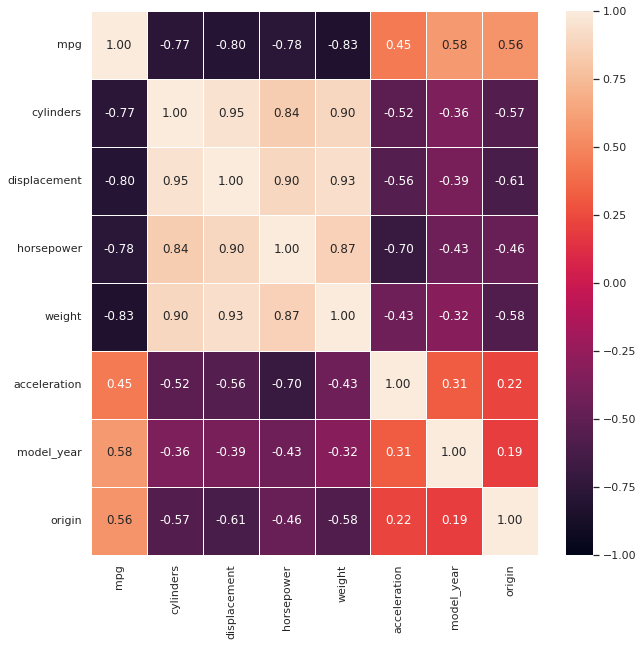

In [70]:
#analisando o relacionamento entre as variáveis
plt.figure(figsize=(10, 10))
sn.set(font_scale=1)
sn.heatmap(base.corr(),annot=True,vmin=-1, vmax=1,linewidth=.5,fmt=".2f");
plt.show()

HP
b em X:  39.902729791539784
a em X:  [-0.15840255]
Coef.Det.:  0.6076020469142062


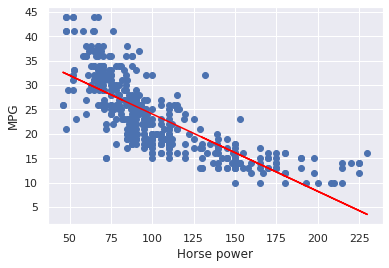

Cilindros
b em X:  42.738476696279264
a em X:  [-3.55011138]
Coef. Det.:  0.5958623211620506


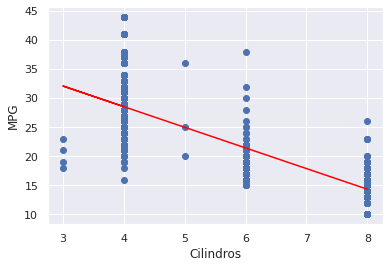

In [71]:
#instanciando e treinando os modelos lineares
hp = hp.reshape(-1,1)
modelo1 = LinearRegression()
modelo1.fit(hp,mpg)

print ("HP")
print ("b em X: ", modelo1.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo1.coef_) #obtendo a inclinação do modelo
print ("Coef.Det.: ",modelo1.score(hp,mpg)) #obtendo o coeficiente de determinação do modelo

plt.scatter(hp,mpg)
plt.xlabel("Horse power") #variável explicativa
plt.ylabel("MPG") #variável dependente
plt.plot(hp, modelo1.predict(hp),color='red') #plotando a reta do modelo
plt.show()


cilindros = cilindros.reshape(-1,1)
modelo2 = LinearRegression()
modelo2.fit(cilindros,mpg)

print ("Cilindros")
print ("b em X: ", modelo2.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo2.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",modelo2.score(cilindros,mpg)) #obtendo o coeficiente de determinação do modelo

plt.scatter(cilindros,mpg)
plt.xlabel("Cilindros") #variável explicativa
plt.ylabel("MPG") #variável dependente
plt.plot(cilindros, modelo2.predict(cilindros),color='red') #plotando a reta do modelo
plt.show()

In [72]:
#realizando predições com base em variáveis individuais

#horse power
#qual a média (mpg) do veículo com 175 hp
print("HP: ",modelo1.intercept_ + modelo1.coef_ * 175.0, "MPG - miles per gallon")

#horse power
#qual a média (mpg) do veículo com 150 hp
print("HP: ",modelo1.intercept_ + modelo1.coef_ * 150.0, "MPG - miles per gallon")

HP:  [12.18228322] MPG - miles per gallon
HP:  [16.14234702] MPG - miles per gallon


In [73]:
#avaliando os resíduos dos modelos contruídos
#modelo1 --> horse power
#modelo2 --> cilindros

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("HP")
predict = modelo1.predict(hp)
print("Erro médio quadrático (MSE): ", mean_squared_error(mpg,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(mpg,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(mpg,predict))

print()
print("Cilindros")
predict = modelo2.predict(cilindros)
print("Erro médio quadrático (MSE): ", mean_squared_error(mpg,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(mpg,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(mpg,predict))


HP
Erro médio quadrático (MSE):  24.239849398086896
Raiz quadrada do Erro médio quadrático (RMSE):  4.923398155551397
Erro médio absoluto (MAE):  3.8706994226106963

Cilindros
Erro médio quadrático (MSE):  24.96505497566256
Raiz quadrada do Erro médio quadrático (RMSE):  4.996504275557318
Erro médio absoluto (MAE):  3.763893918562721


In [74]:
#construindo um modelo baseado em múltiplas variáveis explicativas

NovaBase = pd.DataFrame(base,columns=base.columns[1:-2])
RegMultipla = LinearRegression().fit(NovaBase, mpg)

print ("Todas as variáveis")
print ("b em X: ", RegMultipla.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", RegMultipla.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",RegMultipla.score(NovaBase,mpg)) #obtendo o coeficiente de determinação do modelo

predict = RegMultipla.predict(NovaBase)
print("\nAnálise de Resíduos")
print("Erro médio quadrático (MSE): ", mean_squared_error(mpg,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(mpg,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(mpg,predict))

Todas as variáveis
b em X:  -16.47234827928501
a em X:  [-0.44899013  0.02295395 -0.01701134 -0.00684634  0.12037213  0.73420704
  1.47043414]
Coef. Det.:  0.8141470192854814

Análise de Resíduos
Erro médio quadrático (MSE):  11.480814890286897
Raiz quadrada do Erro médio quadrático (RMSE):  3.388335120717385
Erro médio absoluto (MAE):  2.5975586530465193


In [75]:
#construindo um modelo de regressão com hold-out
from sklearn.model_selection import train_test_split 

NovaBase = pd.DataFrame(base,columns=base.columns[1:-2])

x_treino, x_teste, y_treino, y_teste = train_test_split(NovaBase, mpg, test_size=0.5, random_state=10,shuffle=True)
x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)
Modelo = LinearRegression().fit(x_treino, y_treino)

print("Modelo construído")
print ("b em X: ", Modelo.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", Modelo.coef_) #obtendo a inclinação do modelo

print ("\n\nTodas as variáveis sobre o conjunto de treino")
print ("Coef. Det. sobre o treino: ",Modelo.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo
predict = Modelo.predict(x_treino)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_treino,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_treino,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_treino,predict))


print ("\n\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",Modelo.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = Modelo.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))

Modelo construído
b em X:  -13.119733781128268
a em X:  [-0.73429224  0.02148316 -0.00511724 -0.00676353  0.27920076  0.67125756
  1.1031182 ]


Todas as variáveis sobre o conjunto de treino
Coef. Det. sobre o treino:  0.8213896514694236
Análise de Resíduos
Erro médio quadrático (MSE):  11.780295838018638
Raiz quadrada do Erro médio quadrático (RMSE):  3.432243557502678
Erro médio absoluto (MAE):  2.7071163312993267


Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.8063322999350588
Análise de Resíduos
Erro médio quadrático (MSE):  11.216122260393082
Raiz quadrada do Erro médio quadrático (RMSE):  3.3490479632864445
Erro médio absoluto (MAE):  2.53332182938954


###################################

**TREINAMENTO DOS MODELOS DE REGRESSÃO**

###################################

In [76]:
# KNN - 0.517 seg
from sklearn.neighbors import KNeighborsRegressor
knn_result = []

for i in range(1, 51):
  for j in ["uniform","distance"]:
    KNN = KNeighborsRegressor(n_neighbors=i,weights=j)
    KNN.fit(x_treino,y_treino)
    knn_coef_det = KNN.score(x_validacao,y_validacao) #obtendo o coeficiente de determinação do modelo
    knn_predict = KNN.predict(x_validacao)
    knn_mse = mean_squared_error(y_validacao,knn_predict,squared=True)
    knn_rmse = mean_squared_error(y_validacao,knn_predict,squared=False)
    knn_mae = mean_absolute_error(y_validacao,knn_predict)
    knn_result.append({
      'knn_coef_det': knn_coef_det,
      'knn_mse': knn_mse,
      'knn_rmse': knn_rmse,
      'knn_mae': knn_mae,
      'weight': j,
      'kneighbor': i,
      'predict': knn_predict})

knn_result.sort(key=lambda x: x['knn_rmse']) # orderna pelo rmse
knn_best_result = knn_result[0:1] # melhor resultado - menor rmse

df_knn = pd.DataFrame.from_dict(knn_best_result)
display(df_knn)

print ("Erro médio quadrático (MSE): ", knn_best_result[0]['knn_mse'])
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", knn_best_result[0]['knn_rmse'])
print ("Erro médio absoluto (MAE): ", knn_best_result[0]['knn_mae'])

,knn_coef_det,knn_mse,knn_rmse,knn_mae,weight,kneighbor,predict
0,0.719073,16.062646,4.007823,2.960465,distance,5,"[34.88391850202382, 26.48393266675427, 13.9213..."


Erro médio quadrático (MSE):  16.0626458632798
Raiz quadrada do Erro médio quadrático (RMSE):  4.007823082831851
Erro médio absoluto (MAE):  2.960465443758255


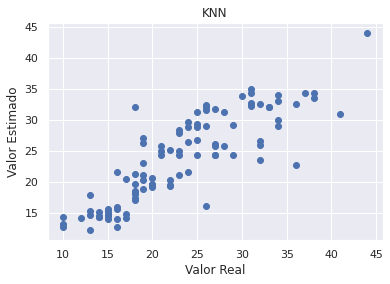

In [77]:
plt.scatter(y_validacao, knn_best_result[0]['predict'])
plt.title('KNN')
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()

In [78]:
#RANDOM FOREST - 2 min 50 seg
from sklearn.ensemble import RandomForestRegressor
rf_result = []

for max_depth in range(5, 11):
  for criterio in ["squared_error", "absolute_error", "friedman_mse", "poisson"]:
    for min_samples_split in range (3, 8):
      for estimado in range(50, 201, 50):
        RFR = RandomForestRegressor(max_depth=max_depth, n_estimators=estimado, min_samples_split=min_samples_split, criterion=criterio)
        RFR.fit(x_treino,y_treino)
        rf_coef_det = RFR.score(x_validacao,y_validacao) #obtendo o coeficiente de determinação do modelo
        rf_predict = RFR.predict(x_validacao)
        rf_mse = mean_squared_error(y_validacao,rf_predict,squared=True)
        rf_rmse = mean_squared_error(y_validacao,rf_predict,squared=False)
        rf_mae = mean_absolute_error(y_validacao,rf_predict)
        rf_result.append({
        'rf_coef_det': rf_coef_det,
        'rf_mse': rf_mse,
        'rf_rmse': rf_rmse,
        'rf_mae': rf_mae,
        'max_depth': max_depth,
        'criterio': criterio,
        'min_samples_split': min_samples_split,
        'estimado': estimado,
        'predict': rf_predict})

rf_result.sort(key=lambda x: x['rf_rmse']) # orderna pelo rmse
rf_best_result = rf_result[0:1] # melhor resultado - menor rmse

df_rf = pd.DataFrame.from_dict(rf_best_result)
display(df_rf)

print ("Erro médio quadrático (MSE): ", rf_best_result[0]['rf_mse'])
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", rf_best_result[0]['rf_rmse'])
print ("Erro médio absoluto (MAE): ", rf_best_result[0]['rf_mae'])

,rf_coef_det,rf_mse,rf_rmse,rf_mae,max_depth,criterio,min_samples_split,estimado,predict
0,0.877535,7.002238,2.646174,1.903785,7,friedman_mse,3,50,"[32.584944444444446, 33.46883928571428, 13.439..."


Erro médio quadrático (MSE):  7.002237844677912
Raiz quadrada do Erro médio quadrático (RMSE):  2.646174190161697
Erro médio absoluto (MAE):  1.903784768884605


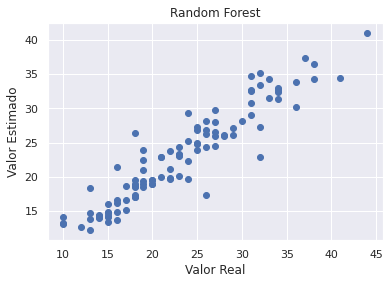

In [79]:
plt.scatter(y_validacao, rf_best_result[0]['predict'])
plt.title('Random Forest')
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()

In [80]:
# SVR - 57 seg
from sklearn.svm import SVR
svr_result = []

for sm in range (1, 11):
  for kernel in ['linear', 'poly', 'rbf','sigmoid']:
    C = sm/10
    svr = SVR(kernel=kernel, C=C)
    svr.fit(x_treino, y_treino)
    svr_coef_det = svr.score(x_validacao, y_validacao)
    svr_predict = svr.predict(x_validacao)
    svr_mse = mean_squared_error(y_validacao, svr_predict, squared=True)
    svr_rmse = mean_squared_error(y_validacao, svr_predict, squared=False)
    svr_mae = mean_absolute_error(y_validacao, svr_predict)
    svr_result.append({
            'svr_coef_det': svr_coef_det,
            'svr_mse': svr_mse,
            'svr_rmse': svr_rmse,
            'svr_mae': svr_mae,
            'C': C,
            'kernel': kernel,
            'predict': svr_predict
        })

svr_result.sort(key=lambda x: x['svr_rmse']) # orderna pelo rmse
svr_best_result = svr_result[0:1] # melhor resultado - menor rmse

df_svr = pd.DataFrame.from_dict(svr_best_result)
display(df_svr)

print ("Erro médio quadrático (MSE): ", svr_best_result[0]['svr_mse'])
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", svr_best_result[0]['svr_rmse'])
print ("Erro médio absoluto (MAE): ", svr_best_result[0]['svr_mae'])

,svr_coef_det,svr_mse,svr_rmse,svr_mae,C,kernel,predict
0,0.793306,11.818194,3.43776,2.5594,0.4,linear,"[28.655293316057282, 30.904180722020897, 13.96..."


Erro médio quadrático (MSE):  11.818194153882628
Raiz quadrada do Erro médio quadrático (RMSE):  3.437760048910137
Erro médio absoluto (MAE):  2.5594001578522865


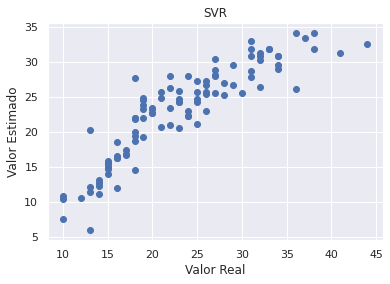

In [81]:
plt.scatter(y_validacao, svr_best_result[0]['predict'])
plt.title('SVR')
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()

###############################################

**AVALIAÇÃO DE DESEMPENHOS SOBRE O CONJUNTO DE TESTE**

###############################################

=================== KNN - 1 =================== 
PARÂMETROS: K= 5 weight distance
Coef. Det. sobre o treino:  0.7319704638799646

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.7319704638799646


=================== REGRESSAO LINEAR - 1 =================== 
Todas as variáveis
b em X:  -13.56980583321112
a em X:  [-0.10729959  0.01968403 -0.04858895 -0.0059341   0.04908781  0.69365356
  1.94052783]
Coef. Det.:  0.8207754660377525


=================== RANDOM FOREST - 1 =================== 
PARÂMETROS: max_depth 7 n_estimators 50 min_samples_split 3 criterion friedman_mse
Coef. Det. sobre o treino:  0.8547483762169126

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.8547483762169126


=================== SVR - 1 =================== 
PARÂMETROS: kernel linear C 1.0
Coef. Det. sobre o treino:  0.8029777009664971

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.8029777009664971




=================== KNN - 2 ===

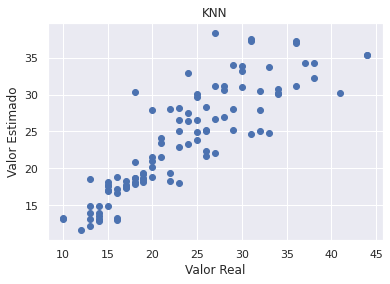



=================== REGRESSAO LINEAR - 10 =================== 
Todas as variáveis
b em X:  -16.85059927787398
a em X:  [-0.41764334  0.02336159 -0.0290001  -0.00629739  0.07760755  0.738291
  1.55706264]
Coef. Det.:  0.8196707294178351


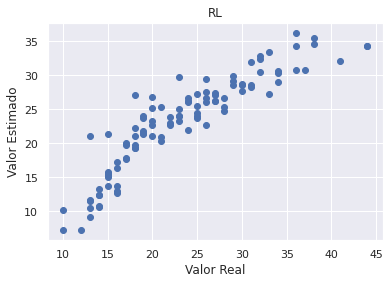



=================== RANDOM FOREST - 10 =================== 
PARÂMETROS: max_depth 7 n_estimators 50 min_samples_split 3 criterion friedman_mse
Coef. Det. sobre o treino:  0.9010732683662185

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.9010732683662185


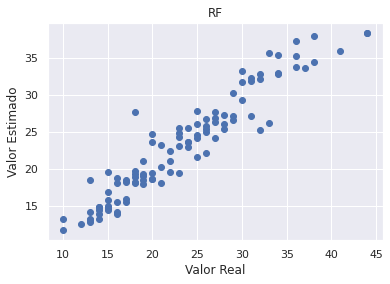



=================== SVR - 10 =================== 
PARÂMETROS: kernel linear C 1.0
Coef. Det. sobre o treino:  0.7946798066914044

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.7946798066914044


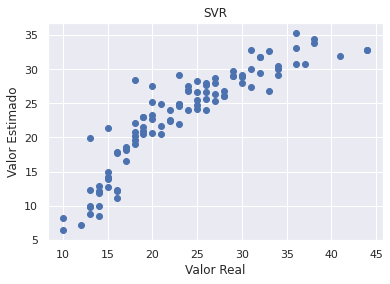





KNN: 3.814967998030972
RF:  2.459354100156466
RL:  3.15612764031352
SVM:  3.230702201520109


In [160]:
def knn(idx, neighbors, weight, x, y):
    KNN = KNeighborsRegressor(n_neighbors=neighbors,weights=weight)
    KNN.fit(x_treino,y_treino)
    print (f"=================== KNN - {idx} =================== ")
    print ("PARÂMETROS: K=", neighbors, "weight", weight)
    print ("Coef. Det. sobre o treino: ",KNN.score(x,y)) #obtendo o coeficiente de determinação do modelo
 
    print ("\nTodas as variáveis sobre o conjunto de teste")
    print ("Coef. Det. sobre o teste: ",KNN.score(x,y)) #obtendo o coeficiente de determinação do modelo
    predict = KNN.predict(x)

    if idx == 10:
      plt.scatter(y, predict)
      plt.title('KNN')
      plt.xlabel("Valor Real") #variável explicativa
      plt.ylabel("Valor Estimado") #variável dependente
      plt.show()
 
    return {
              "mse": mean_squared_error(y,predict,squared=True),
              "rmse": mean_squared_error(y,predict,squared=False),
              "mae": mean_absolute_error(y,predict),
              "predict": predict
          }
 
 
def regressao_linear(idx, x, y):
    RegMultipla = LinearRegression().fit(x_treino, y_treino)
    print(f"=================== REGRESSAO LINEAR - {idx} =================== ")
    print ("Todas as variáveis")
    print ("b em X: ", RegMultipla.intercept_) #obtendo o termo independente do modelo
    print ("a em X: ", RegMultipla.coef_) #obtendo a inclinação do modelo
    print ("Coef. Det.: ",RegMultipla.score(x,y)) #obtendo o coeficiente de determinação do modelo
 
    predict = RegMultipla.predict(x)

    if idx == 10:
      plt.scatter(y, predict)
      plt.title('RL')
      plt.xlabel("Valor Real") #variável explicativa
      plt.ylabel("Valor Estimado") #variável dependente
      plt.show()

    return {
              "mse": mean_squared_error(y,predict,squared=True),
              "rmse": mean_squared_error(y,predict,squared=False),
              "mae": mean_absolute_error(y,predict),
              "predict": predict
          }
 
def random_forest(idx, max_depth, n_estimators, min_samples_split, criterion, x, y):
    RFR = RandomForestRegressor(max_depth=max_depth,n_estimators=n_estimators,min_samples_split=min_samples_split,criterion=criterio)
    RFR.fit(x_treino,y_treino)
    print (f"=================== RANDOM FOREST - {idx} =================== ")
    print ("PARÂMETROS: max_depth", max_depth, "n_estimators", n_estimators, "min_samples_split", min_samples_split, "criterion", criterion)
    print ("Coef. Det. sobre o treino: ",RFR.score(x,y)) #obtendo o coeficiente de determinação do modelo
 
    print ("\nTodas as variáveis sobre o conjunto de teste")
    print ("Coef. Det. sobre o teste: ",RFR.score(x,y)) #obtendo o coeficiente de determinação do modelo
    predict = RFR.predict(x)
 
    if idx == 10:
      plt.scatter(y, predict)
      plt.title('RF')
      plt.xlabel("Valor Real") #variável explicativa
      plt.ylabel("Valor Estimado") #variável dependente
      plt.show()

    return {
              "mse": mean_squared_error(y,predict,squared=True),
              "rmse": mean_squared_error(y,predict,squared=False),
              "mae": mean_absolute_error(y,predict),
              "predict": predict
            }
 
def svr(idx, kernel, c, x, y):
    svr = SVR(kernel=kernel, C=c)
    svr.fit(x_treino,y_treino)
    print (f"=================== SVR - {idx} =================== ")
    print ("PARÂMETROS: kernel", kernel, "C", C)
    print ("Coef. Det. sobre o treino: ",svr.score(x,y)) #obtendo o coeficiente de determinação do modelo
 
    print ("\nTodas as variáveis sobre o conjunto de teste")
    print ("Coef. Det. sobre o teste: ",svr.score(x,y)) #obtendo o coeficiente de determinação do modelo
    predict = svr.predict(x)
 
    if idx == 10:
      plt.scatter(y, predict)
      plt.title('SVR')
      plt.xlabel("Valor Real") #variável explicativa
      plt.ylabel("Valor Estimado") #variável dependente
      plt.show()

    return { "mse": mean_squared_error(y,predict,squared=True),
            "rmse": mean_squared_error(y,predict,squared=False),
            "mae": mean_absolute_error(y,predict),
            "predict": predict
            }
 
 
resultado_KNN = []
resultado_RF = []
resultado_RL = []
resultado_SVR = []
baseRegressao = pd.read_csv(path, sep = ';')
mpg = baseRegressao.iloc[:,0].values # Milhas por galão
newbase = pd.DataFrame(baseRegressao,columns=base.columns[1:-2])
for i in range(1, 11):
  x_treino, x_teste, y_treino, y_teste = train_test_split(newbase, mpg, test_size=0.5, stratify=mpg,shuffle=True)
  x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5, stratify=y_teste,shuffle=True)
  #KNN
  resultado_KNN.append(knn(i, neighbors=knn_best_result[0]['kneighbor'], weight=knn_best_result[0]['weight'], x=x_teste, y=y_teste))
  print("\n")
  #RL
  resultado_RL.append(regressao_linear(i, x=x_teste, y=y_teste))
  print("\n")
  #RF
  resultado_RF.append(random_forest(i, max_depth=rf_best_result[0]['max_depth'], n_estimators=rf_best_result[0]['estimado'], min_samples_split=rf_best_result[0]['min_samples_split'], criterion=rf_best_result[0]['criterio'], x=x_teste, y=y_teste))
  print("\n")
  #SVR
  resultado_SVR.append(svr(i, kernel=svr_best_result[0]['kernel'], c=svr_best_result[0]['C'], x=x_teste, y=y_teste))
  print("\n\n\n")
 
 
print('KNN:', min([k['rmse'] for k in resultado_KNN]))
print('RF: ',min([r['rmse'] for r in resultado_RF]))
print('RL: ', min([r['rmse'] for r in resultado_RL]))
print('SVM: ', min([s['rmse'] for s in resultado_SVR]))

#####################################################

**COMPARAÇÃO DOS DESEMPENHOS APRESENTADOS PELOS MÉTODOS**

#####################################################

In [158]:
rmse_knn = [k['rmse'] for k in resultado_KNN]
rmse_rf = [k['rmse'] for k in resultado_RF]
rmse_rl = [k['rmse'] for k in resultado_RL]
rmse_svr = [k['rmse'] for k in resultado_SVR]

from scipy import stats
print(stats.kruskal(rmse_knn, rmse_rf, rmse_rl))

from scipy.stats import mannwhitneyu
p = mannwhitneyu(rmse_knn, rmse_rf, method="exact",alternative="two-sided")
print("KNN vs RF: ",p)

p = mannwhitneyu(rmse_knn, rmse_rl, method="exact",alternative="two-sided")
print("KNN vs RL: ",p)

p = mannwhitneyu(rmse_knn, rmse_svr, method="exact",alternative="two-sided")
print("KNN vs SVR: ",p)

p = mannwhitneyu(rmse_rf, rmse_rl, method="exact",alternative="two-sided")
print("RF vs RL: ",p)

p = mannwhitneyu(rmse_rf, rmse_svr, method="exact",alternative="two-sided")
print("RF vs SVR: ",p)

p = mannwhitneyu(rmse_rl, rmse_svr, method="exact",alternative="two-sided")
print("RL vs SVR: ",p)

KruskalResult(statistic=24.033548387096772, pvalue=6.042007742534363e-06)
KNN vs RF:  MannwhitneyuResult(statistic=100.0, pvalue=1.082508822446903e-05)
KNN vs RL:  MannwhitneyuResult(statistic=96.0, pvalue=0.00012990105869362836)
KNN vs SVR:  MannwhitneyuResult(statistic=92.0, pvalue=0.0007252809110394249)
RF vs RL:  MannwhitneyuResult(statistic=3.0, pvalue=7.577561757128321e-05)
RF vs SVR:  MannwhitneyuResult(statistic=3.0, pvalue=7.577561757128321e-05)
RL vs SVR:  MannwhitneyuResult(statistic=40.0, pvalue=0.48125094719521977)
